# Computer Vison libraries in Pytorch


Note: The torch.utils.data.Dataset and torch.utils.data.DataLoader classes aren't only for computer vision in PyTorch, they are capable of dealing with many different types of data.

| **PyTorch module** | **What does it do?** |
|--------------------|----------------------|
| `torchvision` | Contains datasets, model architectures and image transformations often used for computer vision problems. |
| `torchvision.datasets` | Here you'll find many example computer vision datasets for a range of problems from image classification, object detection, image captioning, video classification and more. It also contains a series of base classes for making custom datasets. |
| `torchvision.models` | This module contains well-performing and commonly used computer vision model architectures implemented in PyTorch, you can use these with your own problems. |
| `torchvision.transforms` | Often images need to be transformed (turned into numbers/processed/augmented) before being used with a model, common image transformations are found here. |
| `torch.utils.data.Dataset` | Base dataset class for PyTorch. |
| `torch.utils.data.DataLoader` | Creates a Python iterable over a dataset (created with `torch.utils.data.Dataset`). |


In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

torch.__version__, torchvision.__version__

('2.5.1', '0.20.1')

# Getting a dataset

In [2]:
train_data = datasets.FashionMNIST(
    root='exercises/data', # where to download the data
    train = True, # get training data or not?
    download=True, # download data if it doesn't exits on disk
    transform=ToTensor(), # images come as PIL format, we want to turn it into Torch tensors
    target_transform=None # you can transform labels as well
)

test_data = datasets.FashionMNIST(
    root='exercises/data',
    train=False, # get test data
    download=True, 
    transform=ToTensor()
)

In [3]:
image, label = train_data[0]
image.shape,label

(torch.Size([1, 28, 28]), 9)

## input and output shapes of a computer vision model

In [4]:
image.shape

torch.Size([1, 28, 28])

Note: You'll also see NCHW and NHWC formats where N stands for number of images, C stands for channel, H, W stand for Height and weight. For example if you have a batch_size=32, your tensor shape may be [32, 1, 28, 28]. We'll cover batch sizes later.

PyTorch generally accepts NCHW (channels first) as the default for many operators.

However, PyTorch also explains that NHWC (channels last) performs better and is considered best practice.

For now, since our dataset and models are relatively small, this won't make too much of a difference.

But keep it in mind for when you're working on larger image datasets and using convolutional neural networks (we'll see these later).

In [5]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

image shape: torch.Size([1, 28, 28])


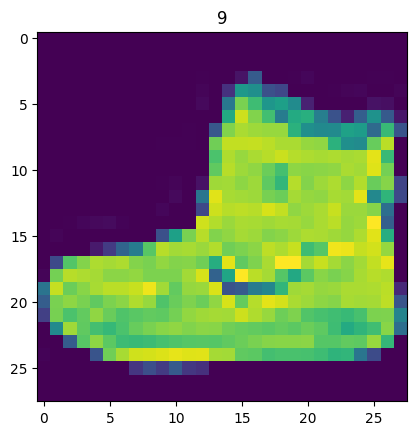

In [7]:
image, label = train_data[0]
print(f'image shape: {image.shape}')
plt.imshow(image.squeeze())
plt.title(label)
plt.show()

Text(0.5, 1.0, 'Ankle boot')

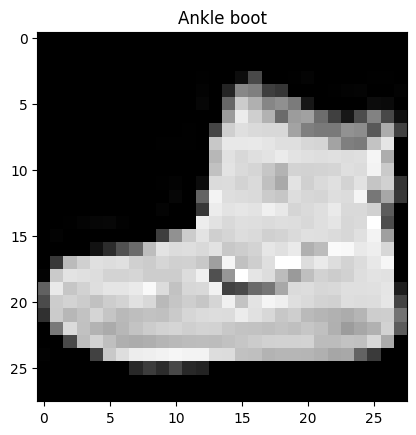

In [8]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])

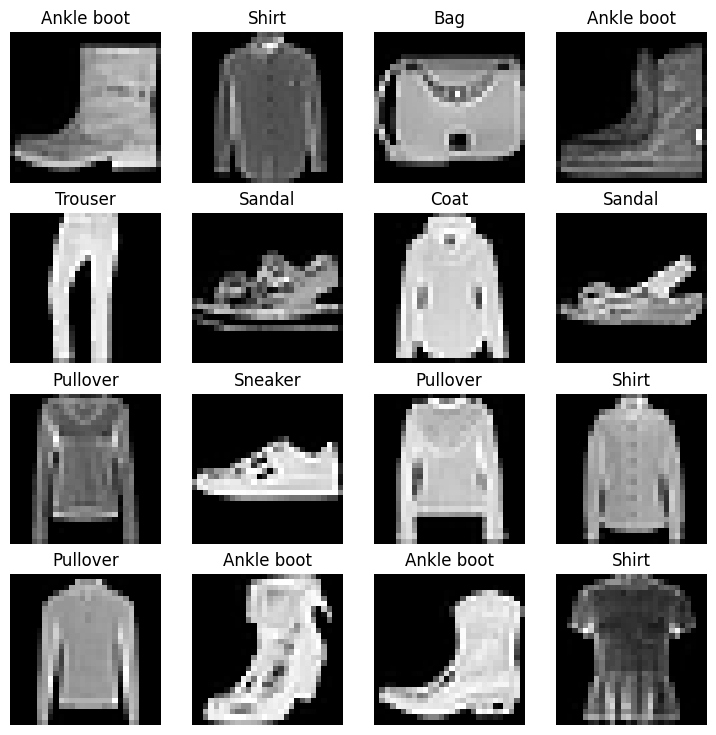

In [9]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

In [10]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f'Dataloader = {train_dataloader, test_dataloader}')
print(f'length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}')
print(f'length of test dataloader {len(test_dataloader)} batches of {BATCH_SIZE}')

Dataloader = (<torch.utils.data.dataloader.DataLoader object at 0x7f1f153357e0>, <torch.utils.data.dataloader.DataLoader object at 0x7f1f15335e70>)
length of train dataloader: 1875 batches of 32
length of test dataloader 313 batches of 32


In [11]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

image size: torch.Size([1, 28, 28])
label: 6, label size: torch.Size([])


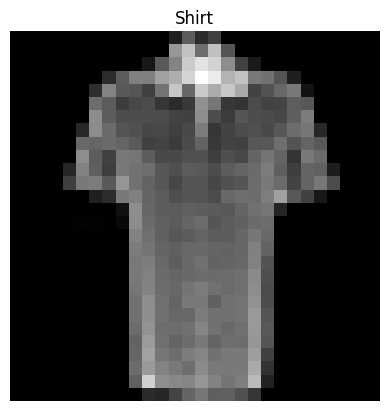

In [12]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis('Off')
print(f'image size: {img.shape}')
print(f'label: {label}, label size: {label.shape}')

# Model 0: build a baseline model

In [13]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
output = flatten_model(x)
print(f'shape before flattening: {x.shape} -> [color_channels, height, width]')
print(f'shape after flattening: {output.shape} -> color_channels, height * width')

print(x)
print(output)

shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
shape after flattening: torch.Size([1, 784]) -> color_channels, height * width
tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 



The `nn.Flatten()` layer took our shape from `[color_channels, height, width]` to `[color_channels, height*width]`.

Why do this?
Because we've now turned our pixel data from height and width dimensions into one long feature vector.

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [15]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_units),
            nn.Linear(hidden_units, output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)


In [16]:
torch.manual_seed(42)

model_0 = FashionMNISTModelV0(input_shape=28*28, hidden_units=10, output_shape=len(class_names)).to(device)
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Setup loss, optimizer and evaluation metrics

In [17]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists, skipping download


In [18]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

## creating a function to time out experiments

In [19]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f'train time on {device}: {total_time:.3f} seconds')
    return total_time

## create a training loop and train a model on batches of data

In [20]:
#import tqdm for progress bar
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"epoch: {epoch}\n-----------")
    train_loss = 0
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()

        y_pred = model_0(X)
        loss = loss_fn(y_pred, y)
        
        train_loss += loss
        
        optimizer.zero_grad()
        
        loss.backward()

        optimizer.step()
        # print out how many samples have been seen
        if(batch % 400 == 0):
            print(f'looked at {batch * len(X)}/{len(train_dataloader.dataset)}')
    
    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0, 0
    model_0.eval()

    with torch.inference_mode():
        for X, y in test_dataloader:
            test_pred = model_0(X)

            test_loss += loss_fn(test_pred, y)

            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
        test_acc /= len(test_dataloader)
        test_loss /= len(test_dataloader)

    print(f'\n Train loss: {train_loss:.5f} | test loss: {test_loss:.5f}, test acc: {test_acc:.2f}%\n')

train_time_end_on_cpu = timer()

total_train_time_model_0 = print_train_time(train_time_start_on_cpu, train_time_end_on_cpu, device= 'cpu')




  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
-----------
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000

 Train loss: 0.59039 | test loss: 0.50954, test acc: 82.04%

epoch: 1
-----------
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000

 Train loss: 0.47633 | test loss: 0.47989, test acc: 83.20%

epoch: 2
-----------
looked at 0/60000
looked at 12800/60000
looked at 25600/60000
looked at 38400/60000
looked at 51200/60000

 Train loss: 0.45503 | test loss: 0.47664, test acc: 83.43%

train time on cpu: 15.097 seconds


# Make predictions and get Model 0 results

In [21]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, 
               accuracy_fn):
    """Returns a dictionary containing the results of model predicting on data_loader.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()

    with torch.inference_mode():
        for X, y in data_loader:
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        loss /= len(data_loader)
        acc /= len(data_loader)
    
    return {"model_name" : model.__class__.__name__,
            "model_loss" : loss,
            "model_acc" : acc}

model_0_results = eval_model(model_0, test_dataloader, loss_fn, accuracy_fn)
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': tensor(0.4766),
 'model_acc': 83.42651757188499}

# Model 1: building a better model with non-lineariry


In [22]:
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape, hidden_unit, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(input_shape, hidden_unit),
            nn.ReLU(),
            nn.Linear(hidden_unit, output_shape),
            nn.ReLU()
        )
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)
    

In [23]:
torch.manual_seed(42)

model_1 = FashionMNISTModelV1(28*28, hidden_unit=10, output_shape=len(class_names)).to(device)

model_1

FashionMNISTModelV1(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

## setup loss, optimizer and evalutation metrics

In [24]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

## Functionizing training and test loops

In [25]:
def train_step(model: torch.nn.Module, 
               data_loader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer, 
               accuracy_fn,
               device):
    train_loss, train_acc = 0, 0
    model.train()
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        y_pred = model(X)

        loss = loss_fn(y_pred, y)

        train_loss += loss

        train_acc += accuracy_fn(y, y_pred.argmax(dim=1))

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)

    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.5f}")


In [26]:
def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module, 
              accuracy_fn,
              device):
    test_loss, test_acc = 0,0
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            X, y = X.to(device), y.to(device)

            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y, test_pred.argmax(dim=1))
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)

        print(f'test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%')

We can customize how often we do a testing step. Sometimes people do them every five epochs or 10 epochs

In [27]:
torch.manual_seed(42)

epochs = 3
train_time_start_on_gpu = timer()
for epoch in tqdm(range(epochs)):
    print(f'epoch: {epoch}\n-----------')
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device='cpu')
    test_step(test_dataloader, model_1, loss_fn, accuracy_fn, 'cpu')


train_time_end_on_gpu = timer()


print_train_time(train_time_start_on_gpu, train_time_end_on_gpu, 'cpu') # hehe my laptop doesn't have cuda btw

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0
-----------
Train loss: 1.09199 | Train acc: 61.34333
test loss: 0.95636 | Test acc: 65.00%
epoch: 1
-----------
Train loss: 0.78101 | Train acc: 71.92833
test loss: 0.72227 | Test acc: 73.91%
epoch: 2
-----------
Train loss: 0.67027 | Train acc: 75.93667
test loss: 0.68500 | Test acc: 75.02%
train time on cpu: 15.242 seconds


15.241589639001177

In [28]:
model_1_results = eval_model(model_1, test_dataloader, loss_fn, accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': tensor(0.6850),
 'model_acc': 75.01996805111821}

It will get wrong if we are using cuda, because we've setup our data and model to use device-agnostic code but not our evaluation function.

In [29]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [30]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': tensor(0.4766),
 'model_acc': 83.42651757188499}



Woah, in this case, it looks like adding non-linearities to our model made it perform worse than the baseline.

That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.

And then the thing you thought might not work does.

It's part science, part art.

From the looks of things, it seems like our model is overfitting on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main ways to fix overfitting include:

1. Using a smaller or different model (some models fit certain kinds of data better than others).
2. Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).

There are more, but I'm going to leave that as a challenge for you to explore.

Try searching online, "ways to prevent overfitting in machine learning" and see what comes up.

In the meantime, let's take a look at number 1: using a different model.


# Model 2: building a convolutional Neural Network

In [31]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """ 
    Model architecture copying TinyVGG from: https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, output_shape: int, hidden_units: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
                      ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(hidden_units*7*7, output_shape)
        )
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(f'Block 1 shape: {x.shape}')
        x = self.block_2(x)
        # print(f'Block 2 shape: {x.shape}')
        x = self.classifier(x)
        # print(f'Block classifier shape: {x.shape}')
        return x

torch.manual_seed(42)

model_2 = FashionMNISTModelV2(1, len(class_names), 10).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [32]:
torch.manual_seed(42)

images = torch.randn(32, 3, 64, 64)
test_image = images[0]
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [33]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3, stride=1, padding=0)

conv_layer(test_image), conv_layer(test_image).shape

(tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
          [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
          [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
          ...,
          [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
          [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
          [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],
 
         [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
          [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
          [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
          ...,
          [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
          [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
          [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],
 
         [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
          [ 0.8117,  0.3191,



If we try to pass a single image in, we get a shape mismatch error:

    RuntimeError: Expected 4-dimensional input for 4-dimensional weight [10, 3, 3, 3], but got 3-dimensional input of size [3, 64, 64] instead

    Note: If you're running PyTorch 1.11.0+, this error won't occur.

This is because our nn.Conv2d() layer expects a 4-dimensional tensor as input with size (N, C, H, W) or [batch_size, color_channels, height, width].

Right now our single image test_image only has a shape of [color_channels, height, width] or [3, 64, 64].

We can fix this for a single image using test_image.unsqueeze(dim=0) to add an extra dimension for N.


In [34]:
test_image.unsqueeze(dim=0).shape

torch.Size([1, 3, 64, 64])

In [35]:
conv_layer(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [36]:
torch.manual_seed(42)

conv_layer_2 = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=(5,5), stride=2, padding=0)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [37]:
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [38]:
print(conv_layer_2.weight.shape)
print(conv_layer_2.bias.shape)

torch.Size([10, 3, 5, 5])
torch.Size([10])


In [39]:
# Get shapes of weight and bias tensors within conv_layer_2
print(f"conv_layer_2 weight shape: \n{conv_layer_2.weight.shape} -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]")
print(f"\nconv_layer_2 bias shape: \n{conv_layer_2.bias.shape} -> [out_channels=10]")

conv_layer_2 weight shape: 
torch.Size([10, 3, 5, 5]) -> [out_channels=10, in_channels=3, kernel_size=5, kernel_size=5]

conv_layer_2 bias shape: 
torch.Size([10]) -> [out_channels=10]


## Stepping through nn.MaxPool2d()

In [40]:
print(f'original shape: {test_image.shape}')
print(f'test image with unsqueezed dimension: {test_image.unsqueeze(dim=0).shape}')

max_pool_layer = nn.MaxPool2d(kernel_size=2)
test_image_through_conv_layer = conv_layer(test_image.unsqueeze(dim=0))
print(f'shape after goring through conv_layer: {test_image_through_conv_layer.shape}')

test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv_layer)
print(f'shape after going through conv_layer and max_pool_layer: {test_image_through_conv_and_max_pool.shape}')

original shape: torch.Size([3, 64, 64])
test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
shape after goring through conv_layer: torch.Size([1, 10, 62, 62])
shape after going through conv_layer and max_pool_layer: torch.Size([1, 10, 31, 31])




Notice the change in the shapes of what's happening in and out of a nn.MaxPool2d() layer.

The kernel_size of the nn.MaxPool2d() layer will affect the size of the output shape.

In our case, the shape halves from a 62x62 image to 31x31 image.

Let's see this work with a smaller tensor.


In [41]:
torch.manual_seed(42)
# Create a random tensor with a similar number of dimensions to our images
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"Random tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

# Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2) # see what happens when you change the kernel_size value 

# Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n{max_pool_tensor} <- this is the maximum value from random_tensor")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")

Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
tensor([[[[0.3367]]]]) <- this is the maximum value from random_tensor
Max pool tensor shape: torch.Size([1, 1, 1, 1])


Essentially, **every layer in a neural network is trying to compress data from higher dimensional space to lower dimensional space.**

In [42]:
random_tensor_2 = torch.rand(size=(1, 1, 4, 4))
print(f'tensor: {random_tensor_2}')
print(f'shape: {random_tensor_2.shape}')
avg_pool_layer = nn.AvgPool2d(kernel_size=2)



avg_pool_tensor = avg_pool_layer(random_tensor_2)

avg_pool_tensor, avg_pool_tensor.shape

tensor: tensor([[[[0.9408, 0.1332, 0.9346, 0.5936],
          [0.8694, 0.5677, 0.7411, 0.4294],
          [0.8854, 0.5739, 0.2666, 0.6274],
          [0.2696, 0.4414, 0.2969, 0.8317]]]])
shape: torch.Size([1, 1, 4, 4])


(tensor([[[[0.6278, 0.6747],
           [0.5426, 0.5057]]]]),
 torch.Size([1, 1, 2, 2]))

In [43]:
torch.mean(random_tensor_2)

tensor(0.5877)

## setup a loss function and optimizer for model2

In [44]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.1)

In [45]:
from timeit import default_timer as timer 
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
    print(f'epoch: {epoch} \n------------')
    train_step(model_2, train_dataloader, loss_fn, optimizer, accuracy_fn, device)
    test_step(test_dataloader, model_2, loss_fn, accuracy_fn, device)

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(train_time_start_model_2, train_time_end_model_2, device)

  0%|          | 0/3 [00:00<?, ?it/s]

epoch: 0 
------------
Train loss: 0.59067 | Train acc: 78.48167
test loss: 0.41121 | Test acc: 84.96%
epoch: 1 
------------
Train loss: 0.36261 | Train acc: 87.00667
test loss: 0.35688 | Test acc: 87.52%
epoch: 2 
------------
Train loss: 0.32490 | Train acc: 88.23833
test loss: 0.35896 | Test acc: 87.11%
train time on cpu: 51.538 seconds


In [46]:
model_2_results = eval_model(model_2, test_dataloader, loss_fn, accuracy_fn, device)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.35896050930023193,
 'model_acc': 87.11062300319489}

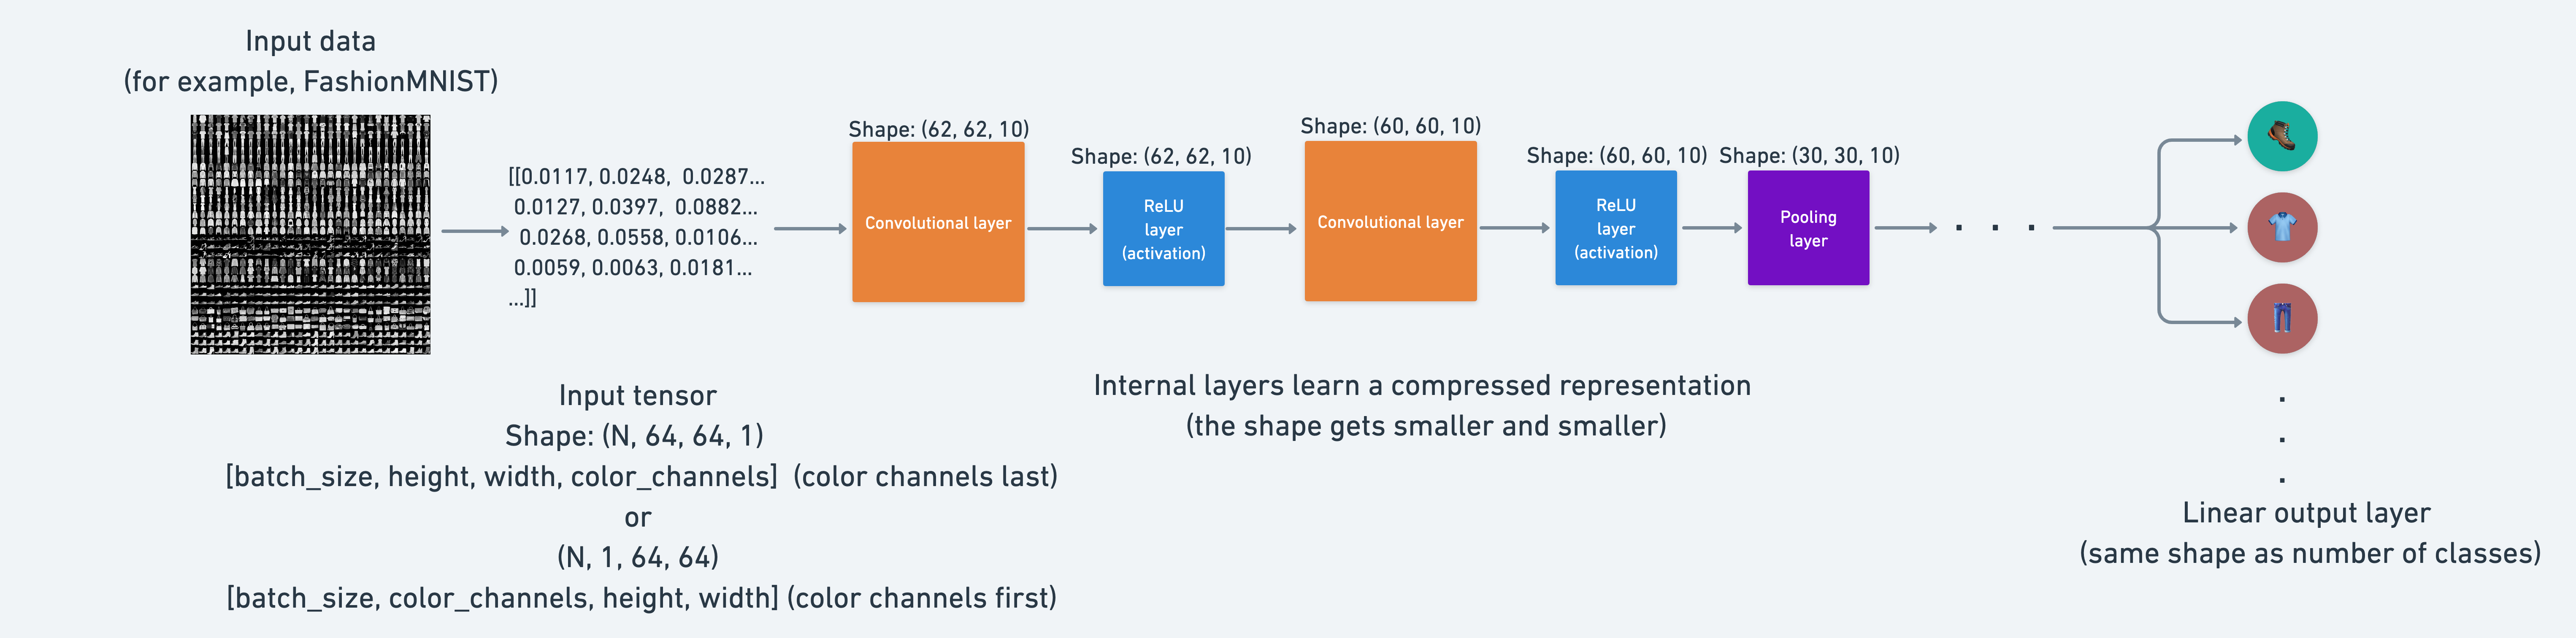

# 8. Compare model results and training time

In [47]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,tensor(0.4766),83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMNISTModelV2,0.358961,87.110623


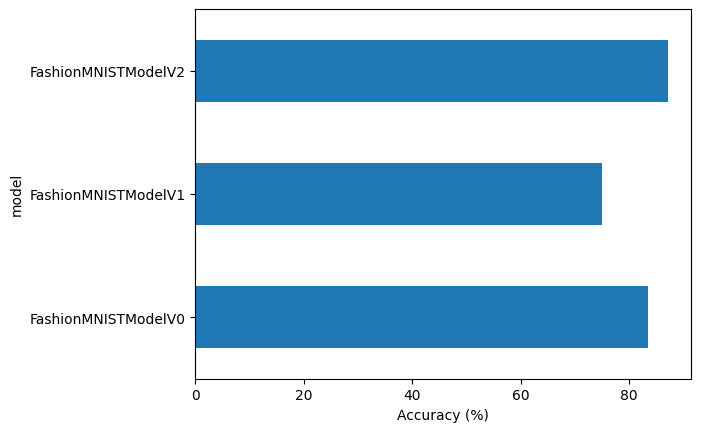

In [48]:
compare_results.set_index("model_name")['model_acc'].plot(kind='barh')
plt.xlabel("Accuracy (%)")
plt.ylabel("model")
plt.show()

# Make and evaluate random predictions with best model

In [49]:
def make_predictions(model: torch.nn.Module, data: list, device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device) 
            # dim = i, set 1 dimension at i-th index, sample = torch.unsqueeze(sample, dim=1), with sample.shape = (C, H, W)   # e.g. (3, 224, 224)
            # sample.shape = (3, 1, 224, 224)
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs)

In [50]:
import random
random.seed(42)

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(f'test sample image shape {test_samples[0].shape}\n test image label {test_labels[0]} ({class_names[test_labels[0]]})')


test sample image shape torch.Size([1, 28, 28])
 test image label 5 (Sandal)


In [51]:
pred_probs = make_predictions(model_2, test_samples)
# pred_probs[:2]
pred_probs

tensor([[2.4754e-05, 5.0319e-06, 2.4570e-07, 1.4263e-07, 5.2328e-08, 9.8152e-01,
         1.2272e-05, 4.1942e-05, 1.0824e-04, 1.8288e-02],
        [9.3525e-02, 3.3124e-01, 2.3390e-03, 5.3949e-01, 8.0881e-03, 3.8390e-04,
         2.4490e-02, 1.9013e-04, 1.3175e-04, 1.1968e-04],
        [7.0630e-06, 2.4411e-07, 2.0159e-06, 1.0057e-06, 8.1537e-08, 3.0515e-05,
         4.9544e-07, 9.4170e-01, 4.8999e-05, 5.8210e-02],
        [5.5904e-03, 7.4745e-04, 3.2385e-01, 4.2058e-03, 6.6266e-01, 1.3185e-05,
         2.0750e-03, 1.6648e-05, 8.1867e-04, 2.8841e-05],
        [2.8509e-01, 5.2797e-05, 5.3091e-04, 6.6712e-01, 2.9953e-04, 6.0637e-05,
         4.6574e-02, 4.7781e-05, 1.4191e-04, 7.8146e-05],
        [8.7090e-01, 1.6964e-05, 2.2287e-03, 1.5346e-03, 1.0416e-03, 8.7449e-07,
         1.2421e-01, 3.4360e-06, 6.7096e-05, 2.7849e-07],
        [5.8257e-04, 1.2485e-04, 6.7324e-02, 3.5055e-05, 8.9550e-01, 1.6634e-05,
         3.0457e-02, 7.3978e-06, 5.9366e-03, 2.0830e-05],
        [8.1893e-06, 4.8761

In [54]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 3, 7, 4, 3, 0, 4, 7, 1])

In [56]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 3, 7, 4, 3, 0, 4, 7, 1]))

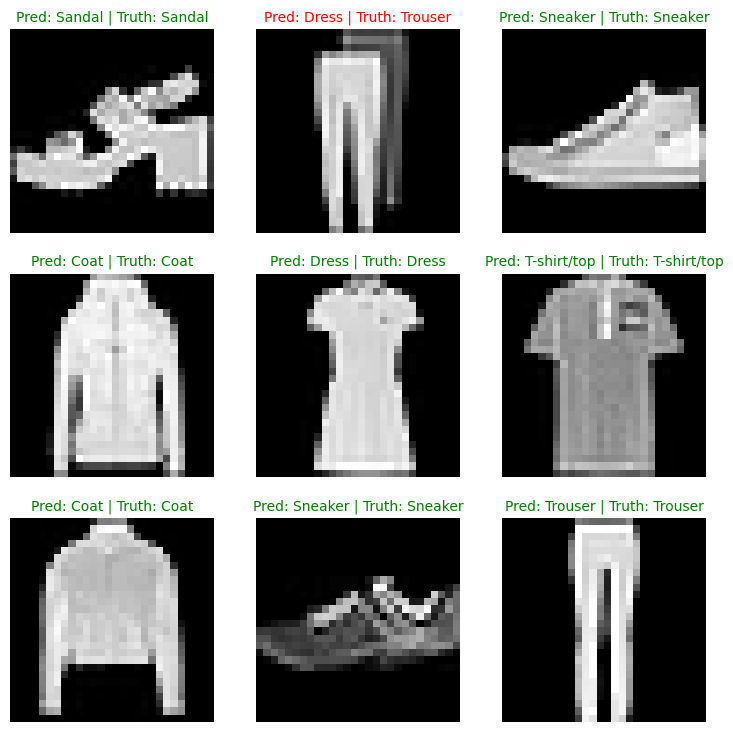

In [57]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(sample.squeeze(), cmap='gray')
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]

    title_text = f"Pred: {pred_label} | Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g") # green text if correct
    else:
        plt.title(title_text, fontsize=10, c="r") # red text if wrong
    plt.axis(False)

# Making a confusion matrix for further prediction evaluation

In [58]:
from tqdm.auto import tqdm

y_preds = []
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc= "Making predictions"):
        X, y = X.to(device), y.to(device)

        y_logit = model_2(X)

        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)

        y_preds.append(y_pred.cpu())
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [59]:
# Import mlxtend upgraded version
import mlxtend 
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.23.4


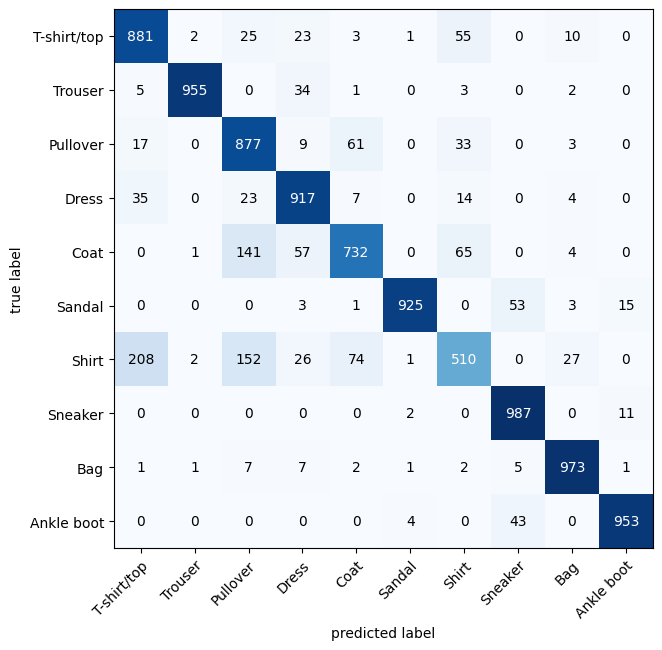

In [60]:
from torchmetrics import ConfusionMatrix 
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds = y_pred_tensor, target = test_data.targets)

fig, ax = plot_confusion_matrix(conf_mat = confmat_tensor.numpy(),
                                class_names = class_names, 
                                figsize=(10,7))

In [61]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [65]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [66]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.35896050930023193,
 'model_acc': 87.11062300319489}



We can find out if two tensors are close to each other using torch.isclose() and passing in a tolerance level of closeness via the parameters atol (absolute tolerance) and rtol (relative tolerance).

If our model's results are close, the output of torch.isclose() should be true.


In [67]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)